# Inicialització components ( llibreries, cuadern, ...)

In [25]:
import pandas as pd
from sklearn.naive_bayes import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, ConfusionMatrixDisplay

from google.colab import drive
from os.path import exists
from os import makedirs

ruta = '/content/sample_data/IOC/IABD/M2/data'
if not exists(ruta):
    makedirs(ruta)

ruta = ruta+'/diamant.csv'

if not exists(ruta):
  !wget -O "/content/sample_data/IOC/IABD/M2/data/diamant.csv" "private address"

diamant_df = pd.read_csv(ruta)
diamant_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
49996,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
49997,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
49998,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [26]:
diamant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    50000 non-null  float64
 1   cut      50000 non-null  object 
 2   color    50000 non-null  object 
 3   clarity  50000 non-null  object 
 4   depth    50000 non-null  float64
 5   table    50000 non-null  float64
 6   price    50000 non-null  int64  
 7   x        50000 non-null  float64
 8   y        50000 non-null  float64
 9   z        50000 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.8+ MB


In [39]:
cat_cols = diamant_df.select_dtypes(include=object).columns.to_list()
num_cols = diamant_df.select_dtypes(exclude=object).columns.to_list()

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
  diamant_df[col]=label_encoder.fit_transform(diamant_df[col])

In [43]:
x = diamant_df.drop('price', axis=1)
y = diamant_df['price']

In [45]:
x

,carat,cut,color,clarity,depth,table,x,y,z,target
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43,326
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31,326
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31,327
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63,334
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...,...,...,...
49995,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50,2757
49996,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61,2757
49997,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56,2757
49998,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74,2757


In [30]:
from logging import exception
def categorical(x_train, y_train, x_test, y_test, alpha=1.0):
  try:
    print(f"CategoricalNB")
    classificador = CategoricalNB(alpha=alpha)
    classificador.fit(x_train, y_train)
    prediccions = classificador.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test, prediccions);
    # Càlcul de les mètriques
    accuracy = accuracy_score(y_test, prediccions)
    precision = precision_score(y_test, prediccions, average='weighted')

    # Mostra de les mètriques
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisió: {precision:.4f}")
  except Exception as ex:
    print(f"CategoricalNB failed {ex}")


In [31]:
def gausian(x_train, y_train, x_test, y_test, alpha=1e-09):
  try:
    print(f"GaussianNB")
    classificador = GaussianNB(var_smoothing=alpha)
    classificador.fit(x_train, y_train)
    prediccions = classificador.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test, prediccions);
    # Càlcul de les mètriques
    accuracy = accuracy_score(y_test, prediccions)
    precision = precision_score(y_test, prediccions, average='weighted')

    # Mostra de les mètriques
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisió: {precision:.4f}")
  except Exception as ex:
    print(f"GaussianNB failed {ex}")

In [32]:
def multimodal(x_train, y_train, x_test, y_test,alpha=1.0):
  try:
    print(f"MultinomialNB")
    classificador = MultinomialNB(alpha=alpha)
    classificador.fit(x_train, y_train)
    prediccions = classificador.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test, prediccions);
    # Càlcul de les mètriques
    accuracy = accuracy_score(y_test, prediccions)
    precision = precision_score(y_test, prediccions, average='weighted')

    # Mostra de les mètriques
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisió: {precision:.4f}")
  except Exception as ex:
    print(f"MultinomialNB failed {ex}")

In [33]:
def complement(x_train, y_train, x_test, y_test,alpha=1.0):
  try:
    print(f"ComplementNB")
    classificador = ComplementNB(alpha=alpha)
    classificador.fit(x_train, y_train)
    prediccions = classificador.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test, prediccions);
    # Càlcul de les mètriques
    accuracy = accuracy_score(y_test, prediccions)
    precision = precision_score(y_test, prediccions, average='weighted')

    # Mostra de les mètriques
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisió: {precision:.4f}")
  except Exception as ex:
    print(f"ComplementNB failed {ex}")


In [34]:
def bernoulli(x_train, y_train, x_test, y_test, alpha=1.0):
  try:
    print(f"BernoulliNB")
    classificador = BernoulliNB(alpha=alpha)
    classificador.fit(x_train, y_train)
    prediccions = classificador.predict(x_test)
    ConfusionMatrixDisplay.from_predictions(y_test, prediccions);
    # Càlcul de les mètriques
    accuracy = accuracy_score(y_test, prediccions)
    precision = precision_score(y_test, prediccions, average='weighted')

    # Mostra de les mètriques
    print(f"Exactitud: {accuracy:.4f}")
    print(f"Precisió: {precision:.4f}")
  except Exception as ex:
    print("BernoulliNB failed {ex}")

# Execució amb tots els algoritmes

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
gausian(x_train, y_train, x_test, y_test)
# categorical dona error a la entrada de dades
categorical(x_train, y_train, x_test, y_test)
bernoulli(x_train, y_train, x_test, y_test)
multimodal(x_train, y_train, x_test, y_test)
complement(x_train, y_train, x_test, y_test)

GaussianNB


# Optimització amb alpha

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
gausian(x_train, y_train, x_test, y_test, 1e-10)
# categorical dona error a la entrada de dades
categorical(x_train, y_train, x_test, y_test, 1.5)
bernoulli(x_train, y_train, x_test, y_test, 1.5)
multimodal(x_train, y_train, x_test, y_test, 1.5)
complement(x_train, y_train, x_test, y_test, 1.5)

GaussianNB
GaussianNB failed
CategoricalNB
CategoricalNB failed
BernoulliNB
BernoulliNB failed
MultinomialNB
MultinomialNB failed
ComplementNB
ComplementNB failed


# Optimització 4

Explorar com estan distribuides les dades per evaluar quines normalitzacions podem realitzar

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

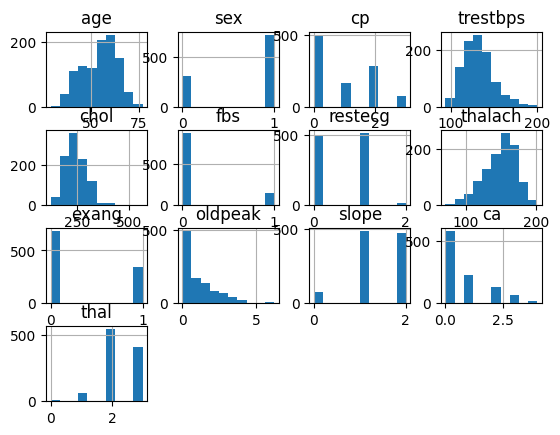

In [ ]:
x.hist()
# x['age'].hist()      # MinMax
# x['cp'].hist()       # 4 categories
# x['trestbps'].hist() # MinMax
# x['chol'].hist()     # MinMax
# x['fbs'].hist()      # 2 categories
# x['restecg'].hist()  # 3 categories
# x['thalach'].hist()  # MinMax
# x['exang'].hist()    # 0.0-0.1 i 0.9-1 2 categories
# x['oldpeak'].hist()  # 0-5 desv 6, va de 0 a 6 disminuint  incremental
# x['slope'].hist()    # 3 categories
# x['ca'].hist()       # 5 categories descendents incremental
# x['thal'].hist()     # 4 categories ascendent incremental

In [ ]:
from sklearn.preprocessing import StandardScaler
# normalitzar rangs alts
scaler = StandardScaler()
columnes_normalized = ['slope', 'thal', 'restecg']
norm_df = x.copy()
# Normaliza las columnas seleccionadas
norm_df[columnes_normalized] = scaler.fit_transform(norm_df[columnes_normalized])
norm_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,0.891255,168,0,1.0,0.995433,2,1.089852
1,53,1,0,140,203,1,-1.004049,155,1,3.1,-2.243675,0,1.089852
2,70,1,0,145,174,0,0.891255,125,1,2.6,-2.243675,0,1.089852
3,61,1,0,148,203,0,0.891255,161,0,0.0,0.995433,1,1.089852
4,62,0,0,138,294,1,0.891255,106,0,1.9,-0.624121,3,-0.522122
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,0.891255,164,1,0.0,0.995433,0,-0.522122
1021,60,1,0,125,258,0,-1.004049,141,1,2.8,-0.624121,1,1.089852
1022,47,1,0,110,275,0,-1.004049,118,1,1.0,-0.624121,1,-0.522122
1023,50,0,0,110,254,0,-1.004049,159,0,0.0,0.995433,0,-0.522122


In [ ]:
v = norm_df['thal'].value_counts()
v

-0.522122    544
 1.089852    410
-2.134096     64
-3.746070      7
Name: thal, dtype: int64

In [ ]:
v = norm_df['slope'].value_counts()
v

-0.624121    482
 0.995433    469
-2.243675     74
Name: slope, dtype: int64

In [ ]:
v = norm_df['restecg'].value_counts()
v

 0.891255    513
-1.004049    497
 2.786558     15
Name: restecg, dtype: int64

In [ ]:
v = norm_df['fbs'].value_counts()
v

0    872
1    153
Name: fbs, dtype: int64

In [ ]:
v = norm_df['exang'].value_counts()
v

0    680
1    345
Name: exang, dtype: int64

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

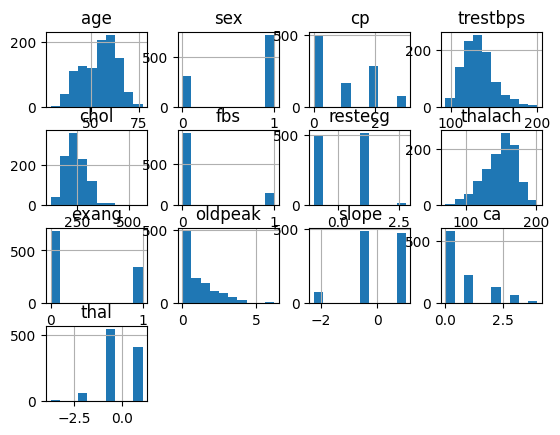

In [ ]:
norm_df.hist()

GaussianNB
Exactitud: 0.8149
Precisió: 0.8244
MultinomialNB
MultinomialNB failed
ComplementNB
ComplementNB failed
BernoulliNB
Exactitud: 0.8182
Precisió: 0.8199


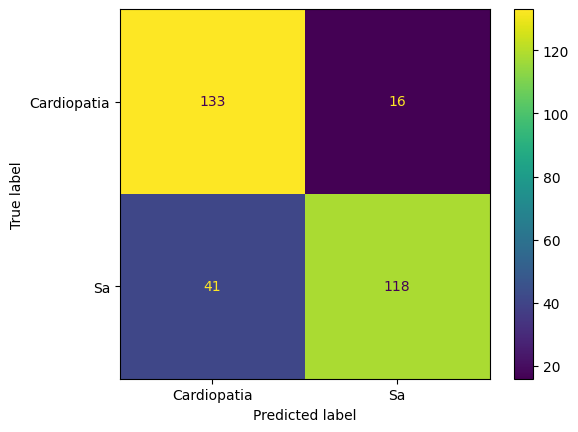

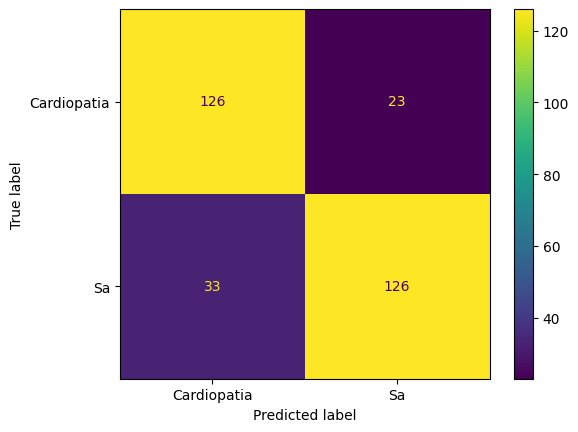

In [ ]:

# Normalitzar valors petits
# scaler = RobustScaler()
# columnes_normalized = ['cp', 'oldpeak', 'ca']
# norm_df[columnes_normalized] = scaler.fit_transform(x[columnes_normalized])
# columnes_normalized = ['slope','thal']

# norm_df[columnes_normalized] = x[columnes_normalized].mean()
x_train, x_test, y_train, y_test = train_test_split(norm_df, y, test_size=0.3, random_state=42)

gausian(x_train, y_train, x_test, y_test)
multimodal(x_train, y_train, x_test, y_test)
complement(x_train, y_train, x_test, y_test)
bernoulli(x_train, y_train, x_test, y_test)

# Altres probes

In [ ]:
from sklearn.preprocessing import RobustScaler
# normalitzar rangs alts
scaler = RobustScaler()
columnes_normalized = ['chol', 'trestbps', 'thalach', 'oldpeak', 'ca']
norm_df = x.copy()
# Normaliza las columnas seleccionadas
norm_df[columnes_normalized] = scaler.fit_transform(norm_df[columnes_normalized])
norm_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,-0.25,-0.437500,0,1,0.470588,0,0.111111,2,2.0,3
1,53,1,0,0.50,-0.578125,1,0,0.088235,1,1.277778,0,0.0,3
2,70,1,0,0.75,-1.031250,0,1,-0.794118,1,1.000000,0,0.0,3
3,61,1,0,0.90,-0.578125,0,1,0.264706,0,-0.444444,2,1.0,3
4,62,0,0,0.40,0.843750,1,1,-1.352941,0,0.611111,1,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,0.50,-0.296875,0,1,0.352941,1,-0.444444,2,0.0,2
1021,60,1,0,-0.25,0.281250,0,0,-0.323529,1,1.111111,1,1.0,3
1022,47,1,0,-1.00,0.546875,0,0,-1.000000,1,0.111111,1,1.0,2
1023,50,0,0,-1.00,0.218750,0,0,0.205882,0,-0.444444,2,0.0,2


GaussianNB
Exactitud: 0.8149
Precisió: 0.8244
BernoulliNB
Exactitud: 0.8117
Precisió: 0.8178


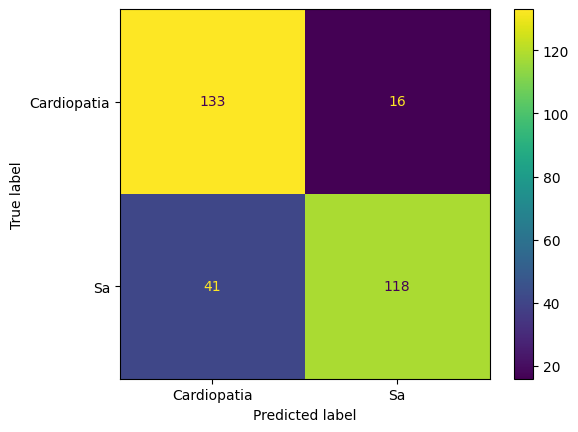

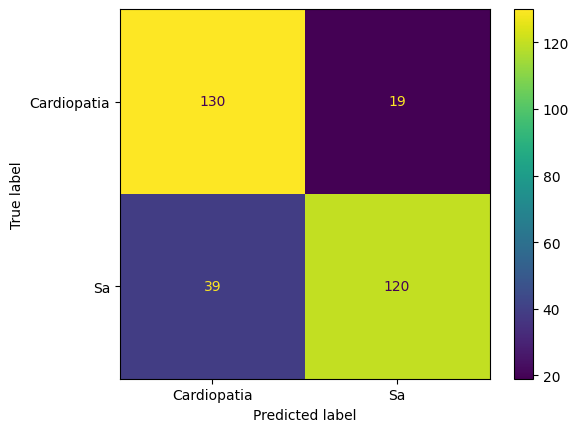

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(norm_df, y, test_size=0.3, random_state=42)

gausian(x_train, y_train, x_test, y_test, 1e-4)
# multimodal(x_train, y_train, x_test, y_test)
# complement(x_train, y_train, x_test, y_test)
bernoulli(x_train, y_train, x_test, y_test)

# Conclusions

Després d'aplicar diferents técniques, diferents normalitzacions de dades,
 suavitzat i treient columnes que podríen ser no critiques com es el sexe, he pogut comprobar que l'algoritme que millor ha rendit ha sigut 'BernoulliNB' amb Exactitud: 0.8506 i Precisió: 0.8560.

Espero que en les properes proves millori aquest rendiment i sigui cosa dels algoritmes de bayes ingenu que no encaixen be amb aquest tipus de dades.

He realitzat moltes proves, comprovació de dades, veure el resultat de la normalització per comprovar si ha ajudat com en el cas de les columnes que el resultat de la normalització quedaba a 0.

Tot i que bernoulliNB es fet servir per entrada de dades binaries, dona aquesta falsa sensació de funcionar be